###    Importation des données 

In [84]:
# importation des bibliothèques necessaires
import pandas as pd 
import numpy as np
import networkx as nx
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split




In [85]:
df_artist = pd.read_csv("C:/Users/pc/Desktop/ID3/SNM/project/facebook_clean_data/artist_edges.csv")
df_athletes = pd.read_csv("C:/Users/pc/Desktop/ID3/SNM/project/facebook_clean_data/athletes_edges.csv")
df_company = pd.read_csv("C:/Users/pc/Desktop/ID3/SNM/project/facebook_clean_data/company_edges.csv")
df_government = pd.read_csv("C:/Users/pc/Desktop/ID3/SNM/project/facebook_clean_data/government_edges.csv")
df_new_sites = pd.read_csv("C:/Users/pc/Desktop/ID3/SNM/project/facebook_clean_data/new_sites_edges.csv")
df_politician = pd.read_csv("C:/Users/pc/Desktop/ID3/SNM/project/facebook_clean_data/politician_edges.csv")
df_public_figure = pd.read_csv("C:/Users/pc/Desktop/ID3/SNM/project/facebook_clean_data/public_figure_edges.csv")
df_tvshow = pd.read_csv("C:/Users/pc/Desktop/ID3/SNM/project/facebook_clean_data/tvshow_edges.csv")

### Analyse exploratoire


les valeurs nulles

In [86]:
df_list =[df_artist, df_tvshow, df_public_figure, df_politician, df_new_sites, df_government, df_company, df_athletes]
for i in df_list:
    missing_values = i.isnull().sum()
    if missing_values.sum() > 0:
    # If there are any missing values, drop the rows with missing values
        i.dropna(inplace=True)
        print("Number of rows dropped:", missing_values.sum())
    else:
        print("No missing values found.")

No missing values found.
No missing values found.
No missing values found.
No missing values found.
No missing values found.
No missing values found.
No missing values found.
No missing values found.


Création des graphes 

In [88]:
graph_list = []

for df in df_list:
    # Créer le graphe à partir du DataFrame
    graph = nx.from_pandas_edgelist(df, 'node_1', 'node_2')
    graph_list.append(graph)


adjacency matrix

In [89]:
adjacency_matrix_list=[]
for graph in graph_list:
    adjacency_matrix = nx.adjacency_matrix(graph, nodelist=sorted(graph.nodes()))
    adjacency_matrix_list.append(adjacency_matrix)

C:\Users\pc\AppData\Local\Temp\ipykernel_21420\3982721572.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adjacency_matrix = nx.adjacency_matrix(graph, nodelist=sorted(graph.nodes()))


matrices des caractéristiques en se basant sur la factorisation de matrices non négatives (NMF)

In [90]:
num_features = 64  # le nombre de caractéristiques à extraire
model = NMF(n_components=num_features)

features = model.fit_transform(adjacency_matrix_list[0])
features_df_artist = pd.DataFrame(features, index=sorted(graph_list[0].nodes()), columns=[f"feature_{i}" for i in range(1, num_features + 1)])


In [91]:
features_df_artist.head()

feature_1  feature_2     feature_3     feature_4     feature_5  \
14        0.0        0.0  3.741933e-19  3.152390e-18  2.801167e-17   
28        0.0        0.0  0.000000e+00  0.000000e+00  0.000000e+00   
35        0.0        0.0  0.000000e+00  3.200369e-18  0.000000e+00   
40        0.0        0.0  0.000000e+00  0.000000e+00  0.000000e+00   
48        0.0        0.0  3.447229e-18  0.000000e+00  0.000000e+00   

       feature_6  feature_7  feature_8  feature_9    feature_10  ...  \
14  2.962558e-17        0.0        0.0        0.0  2.761001e-17  ...   
28  0.000000e+00        0.0        0.0        0.0  0.000000e+00  ...   
35  0.000000e+00        0.0        0.0        0.0  0.000000e+00  ...   
40  0.000000e+00        0.0        0.0        0.0  0.000000e+00  ...   
48  0.000000e+00        0.0        0.0        0.0  3.147304e-17  ...   

    feature_55  feature_56  feature_57  feature_58  feature_59  feature_60  \
14         0.0         0.0         0.0         0.0         0.0    0.000000   
28         0.0         0.0         0.0         0.0         0.0    0.233044   
35         0.0         0.0         0.0         0.0         0.0    0.000000   
40         0.0         0.0         0.0         0.0         0.0    0.000000   
48         0.0         0.0         0.0         0.0         0.0    0.000000   

    feature_61  feature_62  feature_63  feature_64  
14         0.0         0.0         0.0         0.0  
28         0.0         0.0         0.0         0.0  
35         0.0         0.0         0.0         0.0  
40         0.0         0.0         0.0         0.0  
48         0.0         0.0         0.0         0.0  

[5 rows x 64 columns]

In [92]:
features = model.fit_transform(adjacency_matrix_list[1])
features_df_tvshow = pd.DataFrame(features, index=sorted(graph_list[1].nodes()), columns=[f"feature_{i}" for i in range(1, num_features + 1)])

In [93]:
features_df_tvshow.head()

feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0        0.0        0.0        0.0   0.000000        0.0   0.000000   
2        0.0        0.0        0.0   0.000000        0.0   0.000000   
3        0.0        0.0        0.0   0.012059        0.0   0.037532   
4        0.0        0.0        0.0   0.000000        0.0   0.000000   
5        0.0        0.0        0.0   0.000000        0.0   0.000000   

   feature_7  feature_8  feature_9  feature_10  ...  feature_55  feature_56  \
0   0.000000        0.0        0.0         0.0  ...         0.0    0.000000   
2   0.000000        0.0        0.0         0.0  ...         0.0    0.000000   
3   0.003852        0.0        0.0         0.0  ...         0.0    0.184371   
4   0.000000        0.0        0.0         0.0  ...         0.0    0.000000   
5   0.000000        0.0        0.0         0.0  ...         0.0    0.000000   

   feature_57  feature_58  feature_59  feature_60  feature_61    feature_62  \
0         0.0         0.0         0.0         0.0         0.0  0.000000e+00   
2         0.0         0.0         0.0         0.0         0.0  1.226134e-22   
3         0.0         0.0         0.0         0.0         0.0  0.000000e+00   
4         0.0         0.0         0.0         0.0         0.0  0.000000e+00   
5         0.0         0.0         0.0         0.0         0.0  0.000000e+00   

     feature_63    feature_64  
0  8.316608e-40  6.299846e-38  
2  0.000000e+00  0.000000e+00  
3  0.000000e+00  0.000000e+00  
4  8.316608e-40  6.299846e-38  
5  0.000000e+00  0.000000e+00  

[5 rows x 64 columns]

In [94]:
features = model.fit_transform(adjacency_matrix_list[2])
features_df_public_figure = pd.DataFrame(features, index=sorted(graph_list[2].nodes()), columns=[f"feature_{i}" for i in range(1, num_features + 1)])

In [95]:
features_df_public_figure.head()

feature_1  feature_2  feature_3  feature_4  feature_5     feature_6  \
2         0.0        0.0        0.0        0.0   0.490331  7.070330e-31   
4         0.0        0.0        0.0        0.0   0.000000  0.000000e+00   
21        0.0        0.0        0.0        0.0   0.000000  0.000000e+00   
24        0.0        0.0        0.0        0.0   0.000000  0.000000e+00   
34        0.0        0.0        0.0        0.0   0.000000  0.000000e+00   

    feature_7  feature_8  feature_9  feature_10  ...  feature_55  feature_56  \
2         0.0        0.0        0.0    0.000000  ...         0.0         0.0   
4         0.0        0.0        0.0    0.000000  ...         0.0         0.0   
21        0.0        0.0        0.0    0.000000  ...         0.0         0.0   
24        0.0        0.0        0.0    0.241809  ...         0.0         0.0   
34        0.0        0.0        0.0    0.000000  ...         0.0         0.0   

    feature_57  feature_58  feature_59  feature_60  feature_61    feature_62  \
2          0.0         0.0    0.000000    0.000000         0.0  0.000000e+00   
4          0.0         0.0    0.000005    0.000013         0.0  0.000000e+00   
21         0.0         0.0    0.000000    0.000000         0.0  0.000000e+00   
24         0.0         0.0    0.000000    0.000000         0.0  1.813569e-13   
34         0.0         0.0    0.000000    0.000000         0.0  0.000000e+00   

      feature_63    feature_64  
2   0.000000e+00  0.000000e+00  
4   0.000000e+00  0.000000e+00  
21  0.000000e+00  7.019168e-45  
24  1.185463e-13  0.000000e+00  
34  0.000000e+00  7.754953e-45  

[5 rows x 64 columns]

In [96]:
features = model.fit_transform(adjacency_matrix_list[3])
features_df_politician = pd.DataFrame(features, index=sorted(graph_list[3].nodes()), columns=[f"feature_{i}" for i in range(1, num_features + 1)])

In [97]:
features_df_politician.head()

feature_1  feature_2     feature_3  feature_4     feature_5  feature_6  \
0   0.000000e+00        0.0  0.000000e+00        0.0  0.000000e+00   0.241071   
11  0.000000e+00        0.0  1.566355e-61        0.0  0.000000e+00   0.000000   
18  0.000000e+00        0.0  7.570483e-72        0.0  1.922944e-60   0.000000   
22  2.507177e-62        0.0  0.000000e+00        0.0  0.000000e+00   0.000000   
28  0.000000e+00        0.0  1.173054e-99        0.0  0.000000e+00   0.000000   

    feature_7  feature_8  feature_9  feature_10  ...  feature_55  \
0         0.0        0.0        0.0         0.0  ...         0.0   
11        0.0        0.0        0.0         0.0  ...         0.0   
18        0.0        0.0        0.0         0.0  ...         0.0   
22        0.0        0.0        0.0         0.0  ...         0.0   
28        0.0        0.0        0.0         0.0  ...         0.0   

      feature_56    feature_57    feature_58  feature_59    feature_60  \
0   0.000000e+00  1.419732e-33  0.000000e+00         0.0  9.677110e-32   
11  0.000000e+00  0.000000e+00  1.769600e-26         0.0  0.000000e+00   
18  3.254175e-38  0.000000e+00  0.000000e+00         0.0  4.584563e-38   
22  0.000000e+00  0.000000e+00  2.086486e-26         0.0  0.000000e+00   
28  0.000000e+00  0.000000e+00  0.000000e+00         0.0  0.000000e+00   

      feature_61  feature_62    feature_63    feature_64  
0   0.000000e+00         0.0  2.255867e-31  0.000000e+00  
11  0.000000e+00         0.0  0.000000e+00  3.183403e-24  
18  0.000000e+00         0.0  0.000000e+00  1.509527e-35  
22  1.119606e-24         0.0  0.000000e+00  0.000000e+00  
28  0.000000e+00         0.0  0.000000e+00  3.846133e-63  

[5 rows x 64 columns]

In [98]:
features = model.fit_transform(adjacency_matrix_list[4])
features_df_new_sites = pd.DataFrame(features, index=sorted(graph_list[4].nodes()), columns=[f"feature_{i}" for i in range(1, num_features + 1)])

In [99]:
features_df_new_sites.head()

feature_1  feature_2     feature_3     feature_4  feature_5  \
9   3.886251e-32        0.0  4.122350e-30  4.092900e-30        0.0   
14  0.000000e+00        0.0  0.000000e+00  0.000000e+00        0.0   
16  0.000000e+00        0.0  0.000000e+00  0.000000e+00        0.0   
43  0.000000e+00        0.0  0.000000e+00  4.817636e-30        0.0   
61  0.000000e+00        0.0  0.000000e+00  0.000000e+00        0.0   

       feature_6     feature_7  feature_8  feature_9    feature_10  ...  \
9   0.000000e+00  0.000000e+00        0.0        0.0  0.000000e+00  ...   
14  0.000000e+00  0.000000e+00        0.0        0.0  0.000000e+00  ...   
16  1.453392e-27  0.000000e+00        0.0        0.0  6.295307e-25  ...   
43  0.000000e+00  7.845995e-28        0.0        0.0  0.000000e+00  ...   
61  1.324283e-27  8.356120e-28        0.0        0.0  1.687829e-25  ...   

    feature_55  feature_56  feature_57  feature_58  feature_59  feature_60  \
9          0.0         0.0    0.000000         0.0         0.0         0.0   
14         0.0         0.0    0.735364         0.0         0.0         0.0   
16         0.0         0.0    0.000000         0.0         0.0         0.0   
43         0.0         0.0    0.000000         0.0         0.0         0.0   
61         0.0         0.0    0.000000         0.0         0.0         0.0   

    feature_61  feature_62  feature_63  feature_64  
9          0.0         0.0         0.0         0.0  
14         0.0         0.0         0.0         0.0  
16         0.0         0.0         0.0         0.0  
43         0.0         0.0         0.0         0.0  
61         0.0         0.0         0.0         0.0  

[5 rows x 64 columns]

In [100]:
features = model.fit_transform(adjacency_matrix_list[5])
features_df_government = pd.DataFrame(features, index=sorted(graph_list[5].nodes()), columns=[f"feature_{i}" for i in range(1, num_features + 1)])

In [101]:
features_df_government.head()

feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
13        0.0        0.0        0.0        0.0        0.0        0.0   
14        0.0        0.0        0.0        0.0        0.0        0.0   
19        0.0        0.0        0.0        0.0        0.0        0.0   
22        0.0        0.0        0.0        0.0        0.0        0.0   
32        0.0        0.0        0.0        0.0        0.0        0.0   

    feature_7  feature_8  feature_9  feature_10  ...  feature_55  feature_56  \
13        0.0        0.0        0.0         0.0  ...         0.0         0.0   
14        0.0        0.0        0.0         0.0  ...         0.0         0.0   
19        0.0        0.0        0.0         0.0  ...         0.0         0.0   
22        0.0        0.0        0.0         0.0  ...         0.0         0.0   
32        0.0        0.0        0.0         0.0  ...         0.0         0.0   

    feature_57  feature_58  feature_59  feature_60    feature_61  \
13         0.0         0.0         0.0         0.0  0.000000e+00   
14         0.0         0.0         0.0         0.0  0.000000e+00   
19         0.0         0.0         0.0         0.0  0.000000e+00   
22         0.0         0.0         0.0         0.0  1.480981e-10   
32         0.0         0.0         0.0         0.0  0.000000e+00   

      feature_62    feature_63    feature_64  
13  0.000000e+00  0.000000e+00  0.000000e+00  
14  0.000000e+00  0.000000e+00  9.647195e-22  
19  0.000000e+00  2.046940e-22  5.941670e-22  
22  0.000000e+00  0.000000e+00  0.000000e+00  
32  6.782613e-24  1.593354e-22  5.223855e-22  

[5 rows x 64 columns]

In [102]:
features = model.fit_transform(adjacency_matrix_list[6])
features_df_company = pd.DataFrame(features, index=sorted(graph_list[6].nodes()), columns=[f"feature_{i}" for i in range(1, num_features + 1)])

In [103]:
features_df_company.head()

feature_1     feature_2     feature_3  feature_4     feature_5  \
3         0.0  2.155281e-30  0.000000e+00        0.0  1.626817e-29   
9         0.0  2.117261e-30  0.000000e+00        0.0  1.602893e-29   
12        0.0  0.000000e+00  0.000000e+00        0.0  0.000000e+00   
33        0.0  0.000000e+00  0.000000e+00        0.0  0.000000e+00   
34        0.0  2.150490e-30  3.995739e-27        0.0  1.620689e-29   

       feature_6     feature_7     feature_8     feature_9    feature_10  ...  \
3   0.000000e+00  0.000000e+00  3.085921e-28  5.202314e-28  0.000000e+00  ...   
9   0.000000e+00  0.000000e+00  0.000000e+00  5.038612e-28  2.708144e-28  ...   
12  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  ...   
33  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  ...   
34  4.892911e-28  3.940661e-28  3.846094e-28  0.000000e+00  4.362059e-28  ...   

    feature_55  feature_56  feature_57  feature_58  feature_59    feature_60  \
3          0.0         0.0         0.0         0.0         0.0  9.032052e-20   
9          0.0         0.0         0.0         0.0         0.0  0.000000e+00   
12         0.0         0.0         0.0         0.0         0.0  0.000000e+00   
33         0.0         0.0         0.0         0.0         0.0  0.000000e+00   
34         0.0         0.0         0.0         0.0         0.0  0.000000e+00   

      feature_61  feature_62    feature_63    feature_64  
3   0.000000e+00         0.0  0.000000e+00  0.000000e+00  
9   5.961667e-20         0.0  8.087348e-20  0.000000e+00  
12  0.000000e+00         0.0  0.000000e+00  0.000000e+00  
33  0.000000e+00         0.0  0.000000e+00  0.000000e+00  
34  0.000000e+00         0.0  0.000000e+00  1.035793e-19  

[5 rows x 64 columns]

In [104]:
features = model.fit_transform(adjacency_matrix_list[7])
features_df_athletes = pd.DataFrame(features, index=sorted(graph_list[7].nodes()), columns=[f"feature_{i}" for i in range(1, num_features + 1)])

In [105]:
features_df_athletes.head()

feature_1     feature_2  feature_3     feature_4     feature_5  \
19        0.0  0.000000e+00        0.0  0.000000e+00  2.386708e-31   
26        0.0  7.982257e-34        0.0  3.075477e-32  2.396838e-31   
29        0.0  0.000000e+00        0.0  0.000000e+00  2.366986e-31   
34        0.0  9.285694e-34        0.0  3.619209e-32  2.464695e-31   
35        0.0  0.000000e+00        0.0  0.000000e+00  2.397768e-31   

       feature_6     feature_7     feature_8  feature_9    feature_10  ...  \
19  2.599034e-31  0.000000e+00  1.443062e-30        0.0  1.318418e-30  ...   
26  2.620858e-31  8.379002e-31  1.925384e-30        0.0  4.166994e-30  ...   
29  2.572801e-31  0.000000e+00  1.433242e-30        0.0  1.366767e-30  ...   
34  2.678200e-31  1.089917e-30  2.029431e-30        0.0  4.302782e-30  ...   
35  2.579197e-31  0.000000e+00  1.608015e-30        0.0  1.458939e-30  ...   

    feature_55  feature_56  feature_57  feature_58  feature_59  feature_60  \
19         0.0         0.0         0.0         0.0         0.0         0.0   
26         0.0         0.0         0.0         0.0         0.0         0.0   
29         0.0         0.0         0.0         0.0         0.0         0.0   
34         0.0         0.0         0.0         0.0         0.0         0.0   
35         0.0         0.0         0.0         0.0         0.0         0.0   

      feature_61    feature_62  feature_63  feature_64  
19  0.000000e+00  0.000000e+00         0.0         0.0  
26  2.824560e-20  4.938244e-20         0.0         0.0  
29  0.000000e+00  0.000000e+00         0.0         0.0  
34  0.000000e+00  4.178027e-20         0.0         0.0  
35  0.000000e+00  0.000000e+00         0.0         0.0  

[5 rows x 64 columns]

#### Graphe artiste

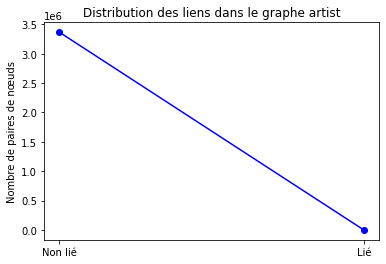

In [106]:
# Supposons que y soit votre matrice d'adjacence binaire
y_flat =adjacency_matrix_list[0].toarray().flatten()
linked_nodes = y_flat.sum()
non_linked_nodes = len(y_flat) - linked_nodes

# Tracer la courbe
plt.plot([0, 1], [non_linked_nodes, linked_nodes], marker='o', linestyle='-', color='b')
plt.xticks([0, 1], ['Non lié', 'Lié'])
plt.ylabel('Nombre de paires de nœuds')
plt.title('Distribution des liens dans le graphe artist')
plt.show()


Le déséquilibre entre les paires de nœuds liées et non liées est attendu dans de tels réseaux. Alors nous devrons peut-être utiliser des techniques spécifiques pour gérer ce déséquilibre

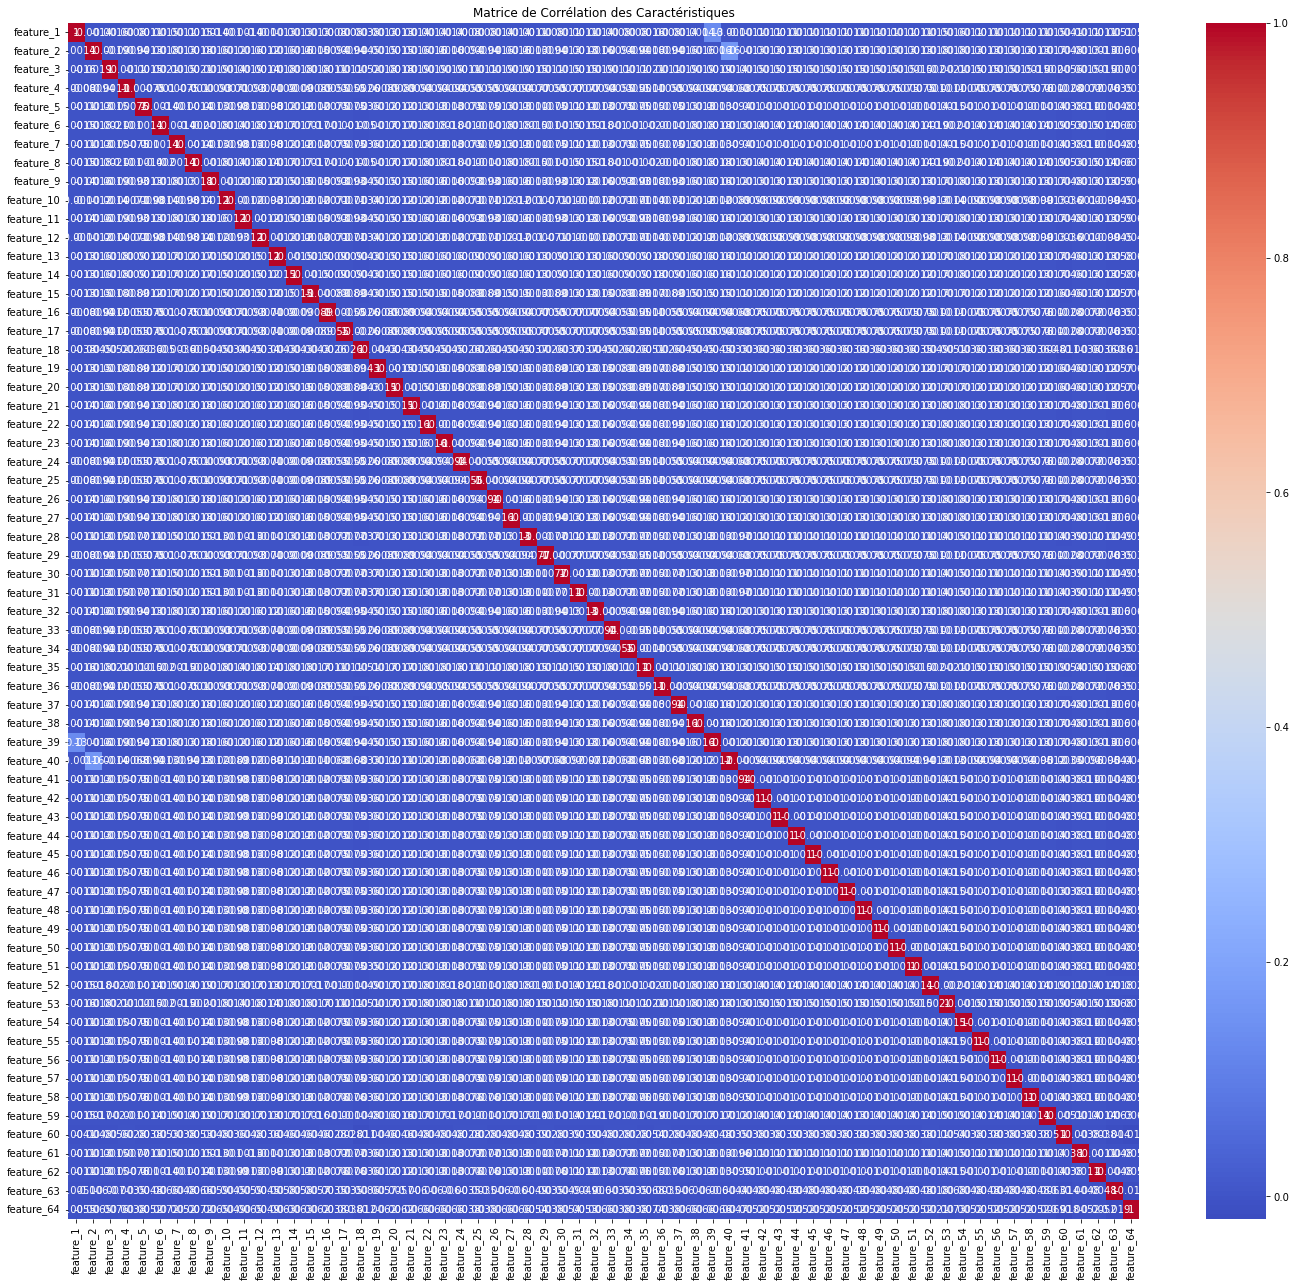

In [107]:
correlation_matrix = features_df_artist.corr()

plt.figure(figsize=(24, 22))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.title('Matrice de Corrélation des Caractéristiques')
plt.show()


corrélation entre les caractéristiques est faible. Cela signifie que chaque caractéristique apporte une information unique au modèle, évitant ainsi la redondance.

#### Graphe tvshow

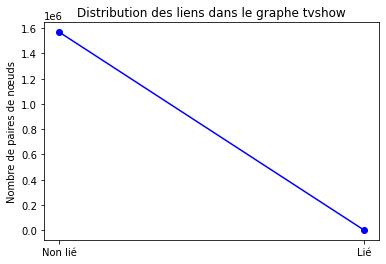

In [108]:
# Supposons que y soit votre matrice d'adjacence binaire
y_flat =adjacency_matrix_list[1].toarray().flatten()
linked_nodes = y_flat.sum()
non_linked_nodes = len(y_flat) - linked_nodes

# Tracer la courbe
plt.plot([0, 1], [non_linked_nodes, linked_nodes], marker='o', linestyle='-', color='b')
plt.xticks([0, 1], ['Non lié', 'Lié'])
plt.ylabel('Nombre de paires de nœuds')
plt.title('Distribution des liens dans le graphe tvshow')
plt.show()


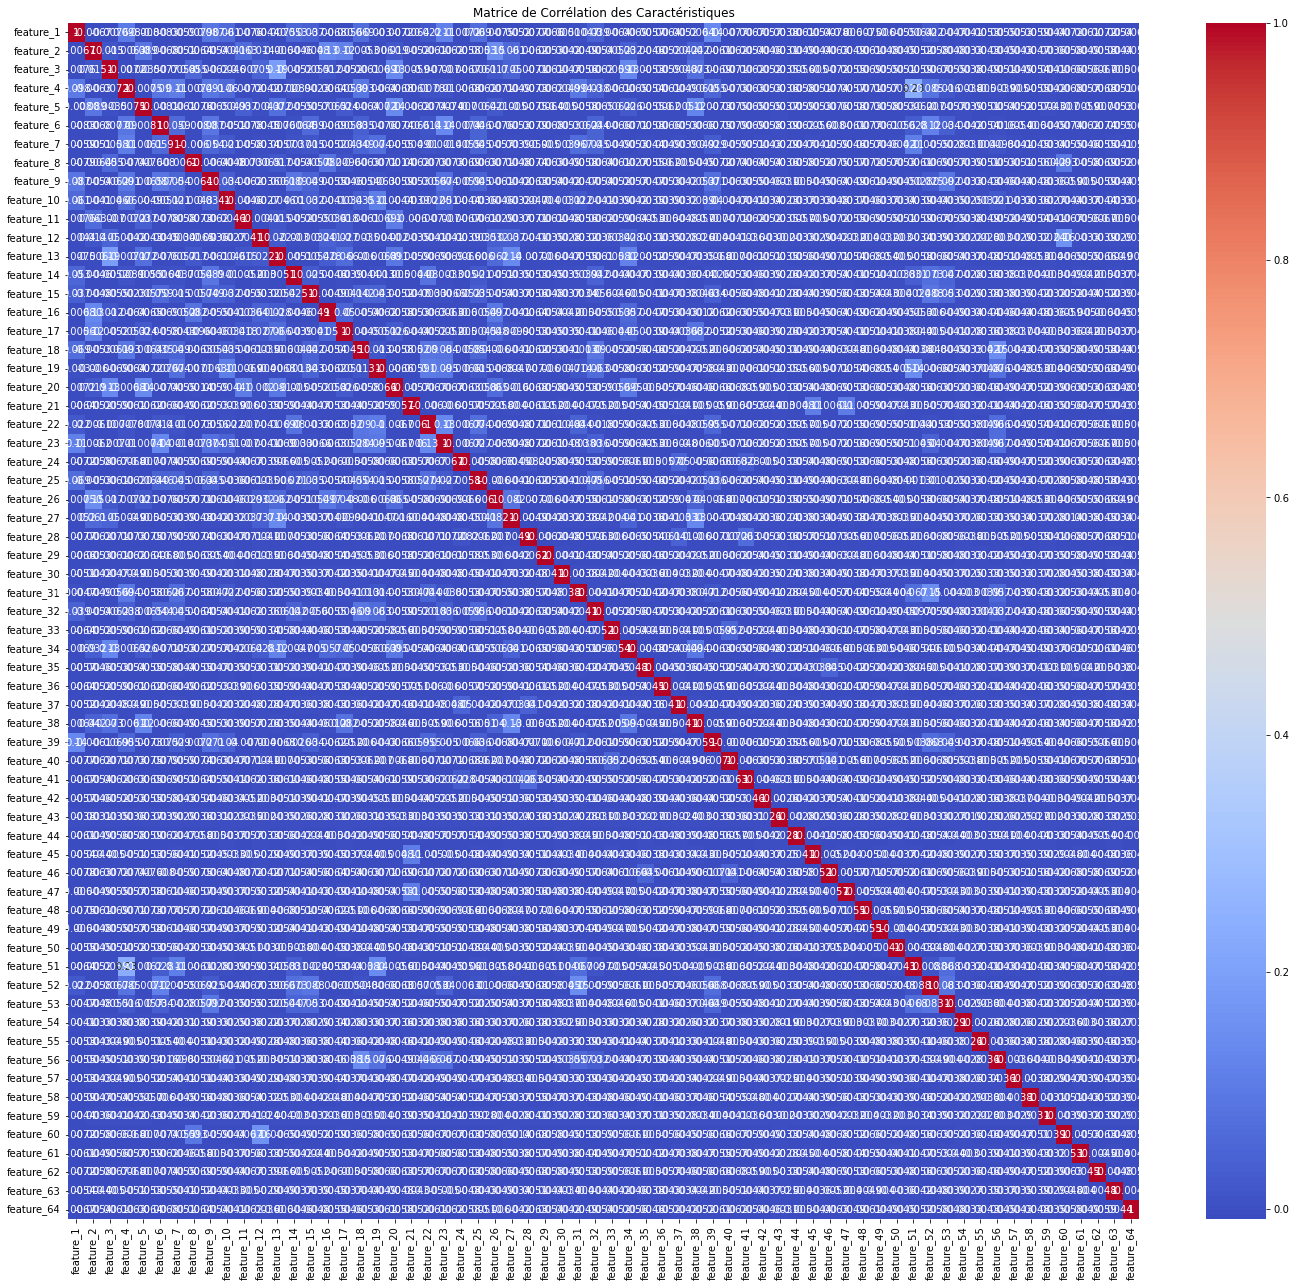

In [109]:
correlation_matrix = features_df_tvshow.corr()

plt.figure(figsize=(24, 22))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.title('Matrice de Corrélation des Caractéristiques')
plt.show()


#### public_figure

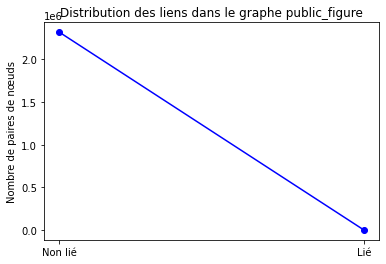

In [110]:
# Supposons que y soit votre matrice d'adjacence binaire
y_flat =adjacency_matrix_list[2].toarray().flatten()
linked_nodes = y_flat.sum()
non_linked_nodes = len(y_flat) - linked_nodes

# Tracer la courbe
plt.plot([0, 1], [non_linked_nodes, linked_nodes], marker='o', linestyle='-', color='b')
plt.xticks([0, 1], ['Non lié', 'Lié'])
plt.ylabel('Nombre de paires de nœuds')
plt.title('Distribution des liens dans le graphe public_figure')
plt.show()


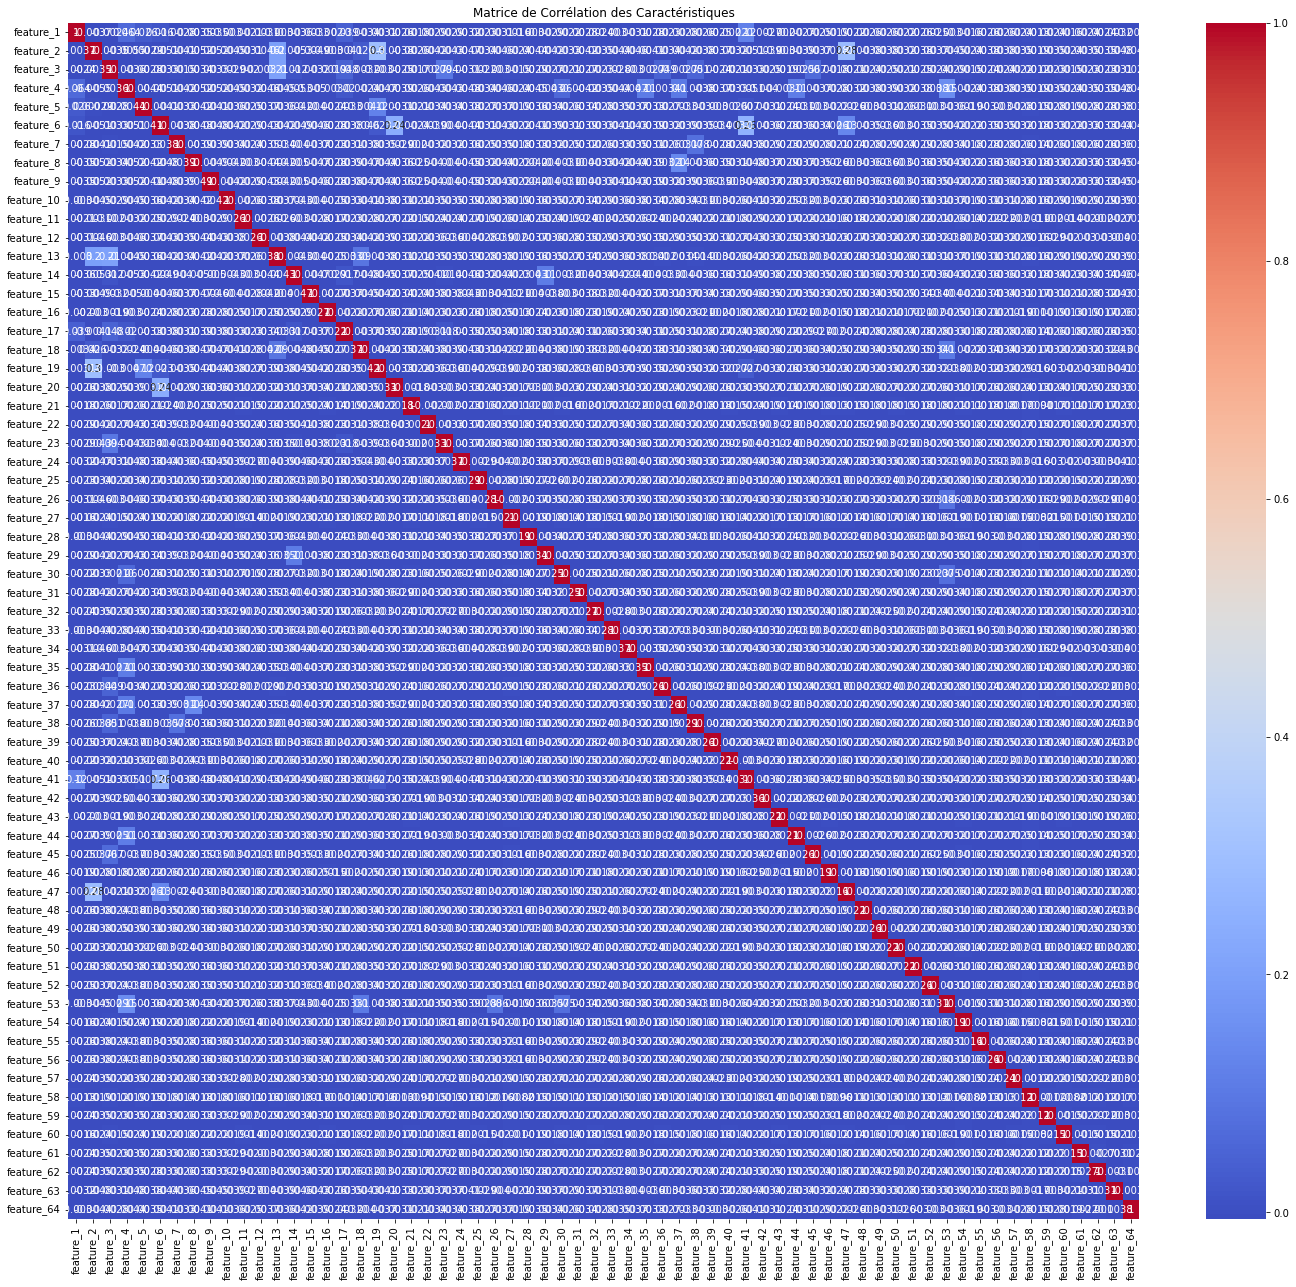

In [111]:
correlation_matrix = features_df_public_figure.corr()

plt.figure(figsize=(24, 22))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.title('Matrice de Corrélation des Caractéristiques')
plt.show()


#### politician

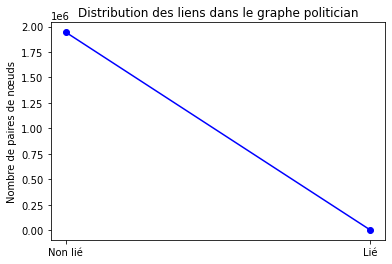

In [112]:
# Supposons que y soit votre matrice d'adjacence binaire
y_flat =adjacency_matrix_list[3].toarray().flatten()
linked_nodes = y_flat.sum()
non_linked_nodes = len(y_flat) - linked_nodes

# Tracer la courbe
plt.plot([0, 1], [non_linked_nodes, linked_nodes], marker='o', linestyle='-', color='b')
plt.xticks([0, 1], ['Non lié', 'Lié'])
plt.ylabel('Nombre de paires de nœuds')
plt.title('Distribution des liens dans le graphe politician')
plt.show()


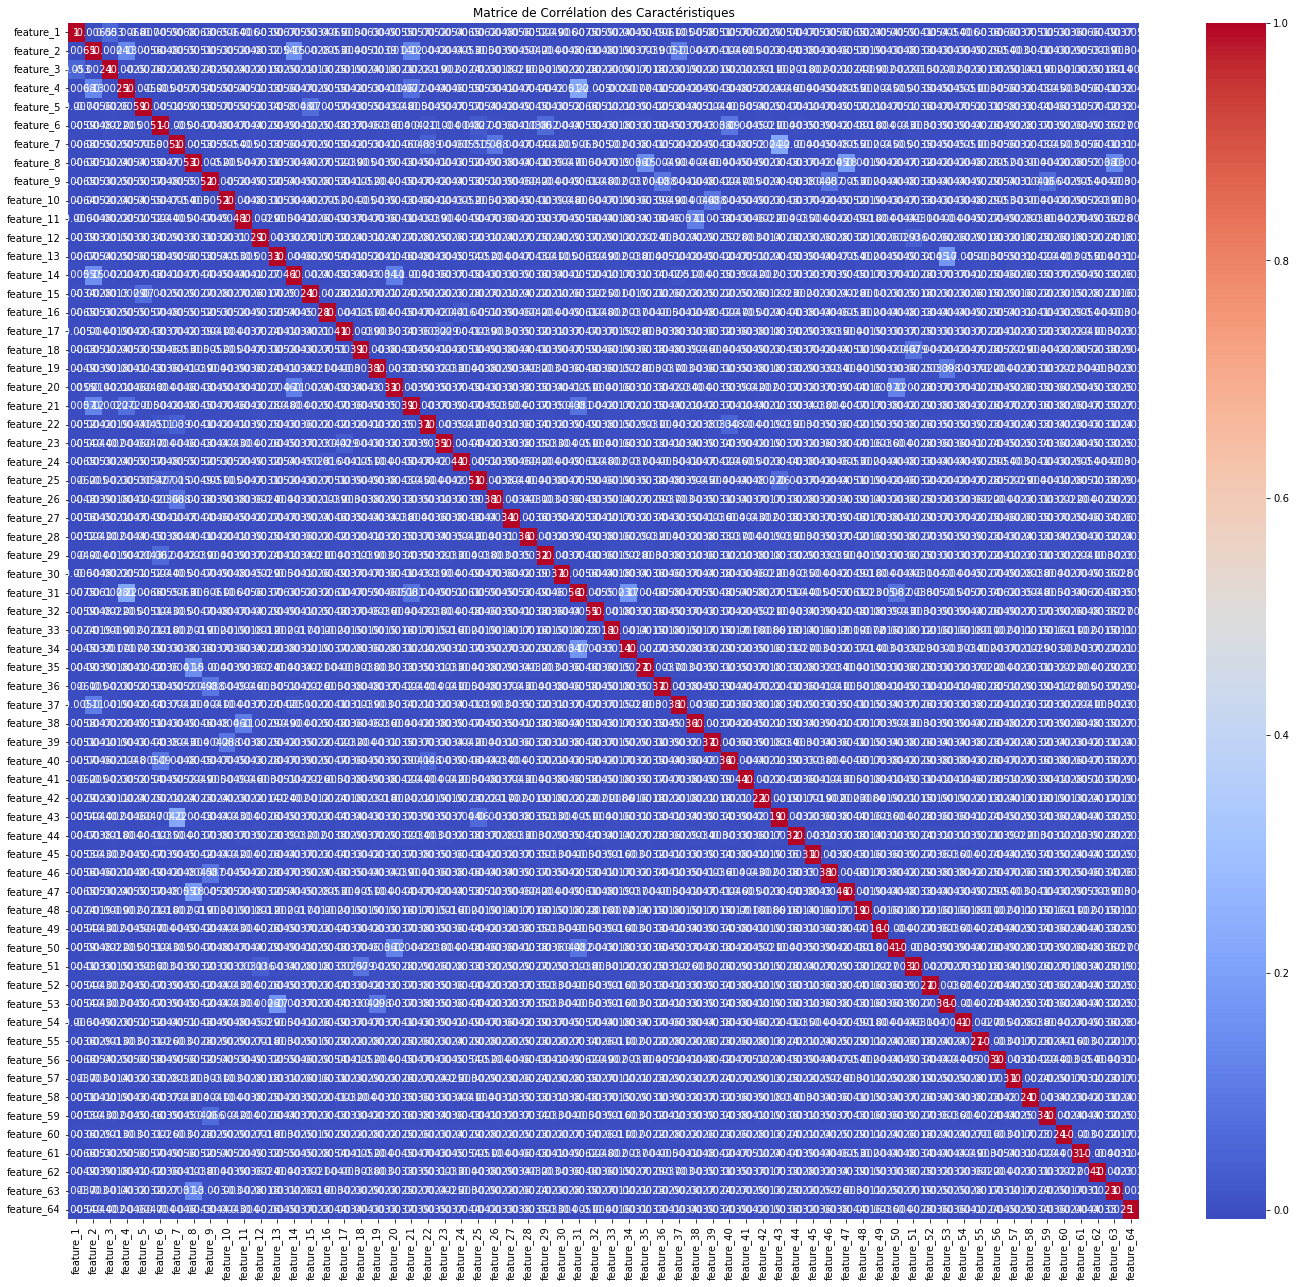

In [113]:
correlation_matrix = features_df_politician.corr()

plt.figure(figsize=(24, 22))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.title('Matrice de Corrélation des Caractéristiques')
plt.show()


#### new_sites

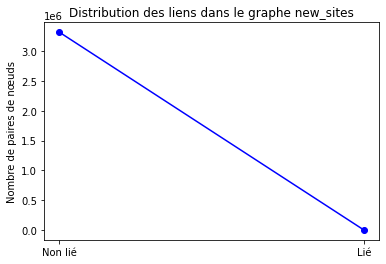

In [114]:
# Supposons que y soit votre matrice d'adjacence binaire
y_flat =adjacency_matrix_list[4].toarray().flatten()
linked_nodes = y_flat.sum()
non_linked_nodes = len(y_flat) - linked_nodes

# Tracer la courbe
plt.plot([0, 1], [non_linked_nodes, linked_nodes], marker='o', linestyle='-', color='b')
plt.xticks([0, 1], ['Non lié', 'Lié'])
plt.ylabel('Nombre de paires de nœuds')
plt.title('Distribution des liens dans le graphe new_sites')
plt.show()


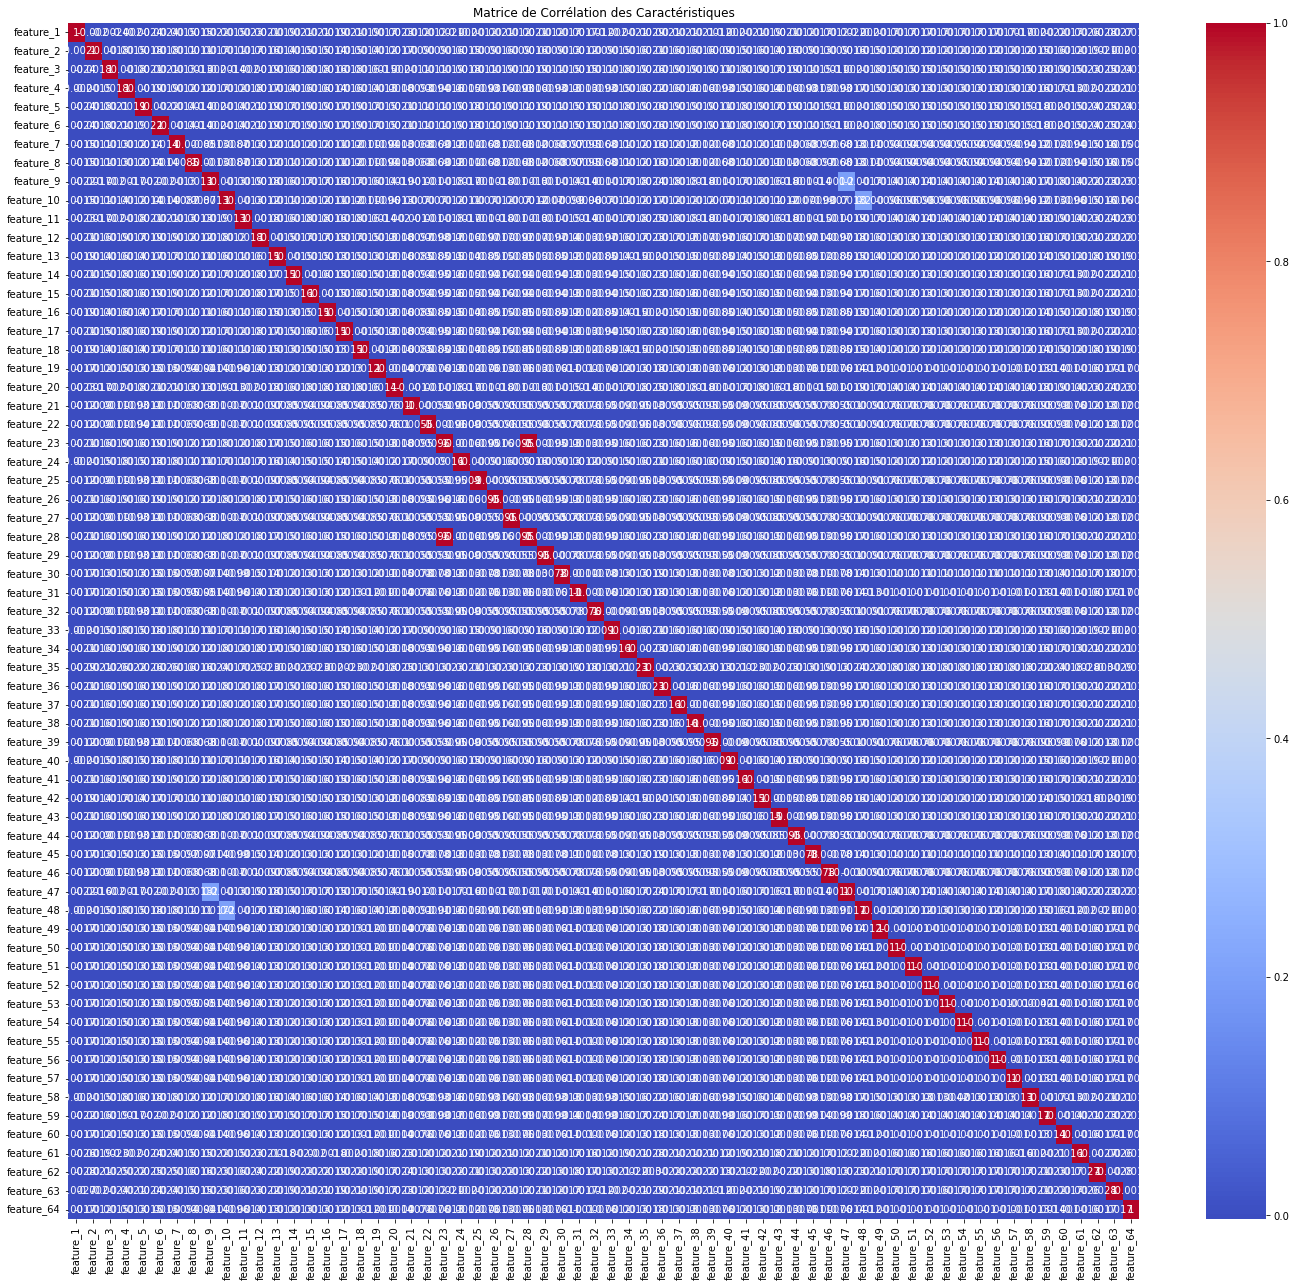

In [115]:
correlation_matrix = features_df_new_sites.corr()

plt.figure(figsize=(24, 22))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.title('Matrice de Corrélation des Caractéristiques')
plt.show()


#### government

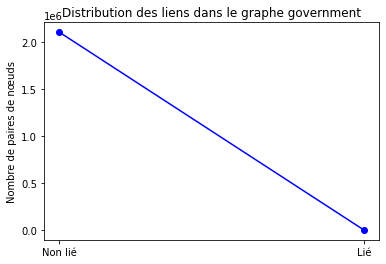

In [116]:
# Supposons que y soit votre matrice d'adjacence binaire
y_flat =adjacency_matrix_list[5].toarray().flatten()
linked_nodes = y_flat.sum()
non_linked_nodes = len(y_flat) - linked_nodes

# Tracer la courbe
plt.plot([0, 1], [non_linked_nodes, linked_nodes], marker='o', linestyle='-', color='b')
plt.xticks([0, 1], ['Non lié', 'Lié'])
plt.ylabel('Nombre de paires de nœuds')
plt.title('Distribution des liens dans le graphe government')
plt.show()


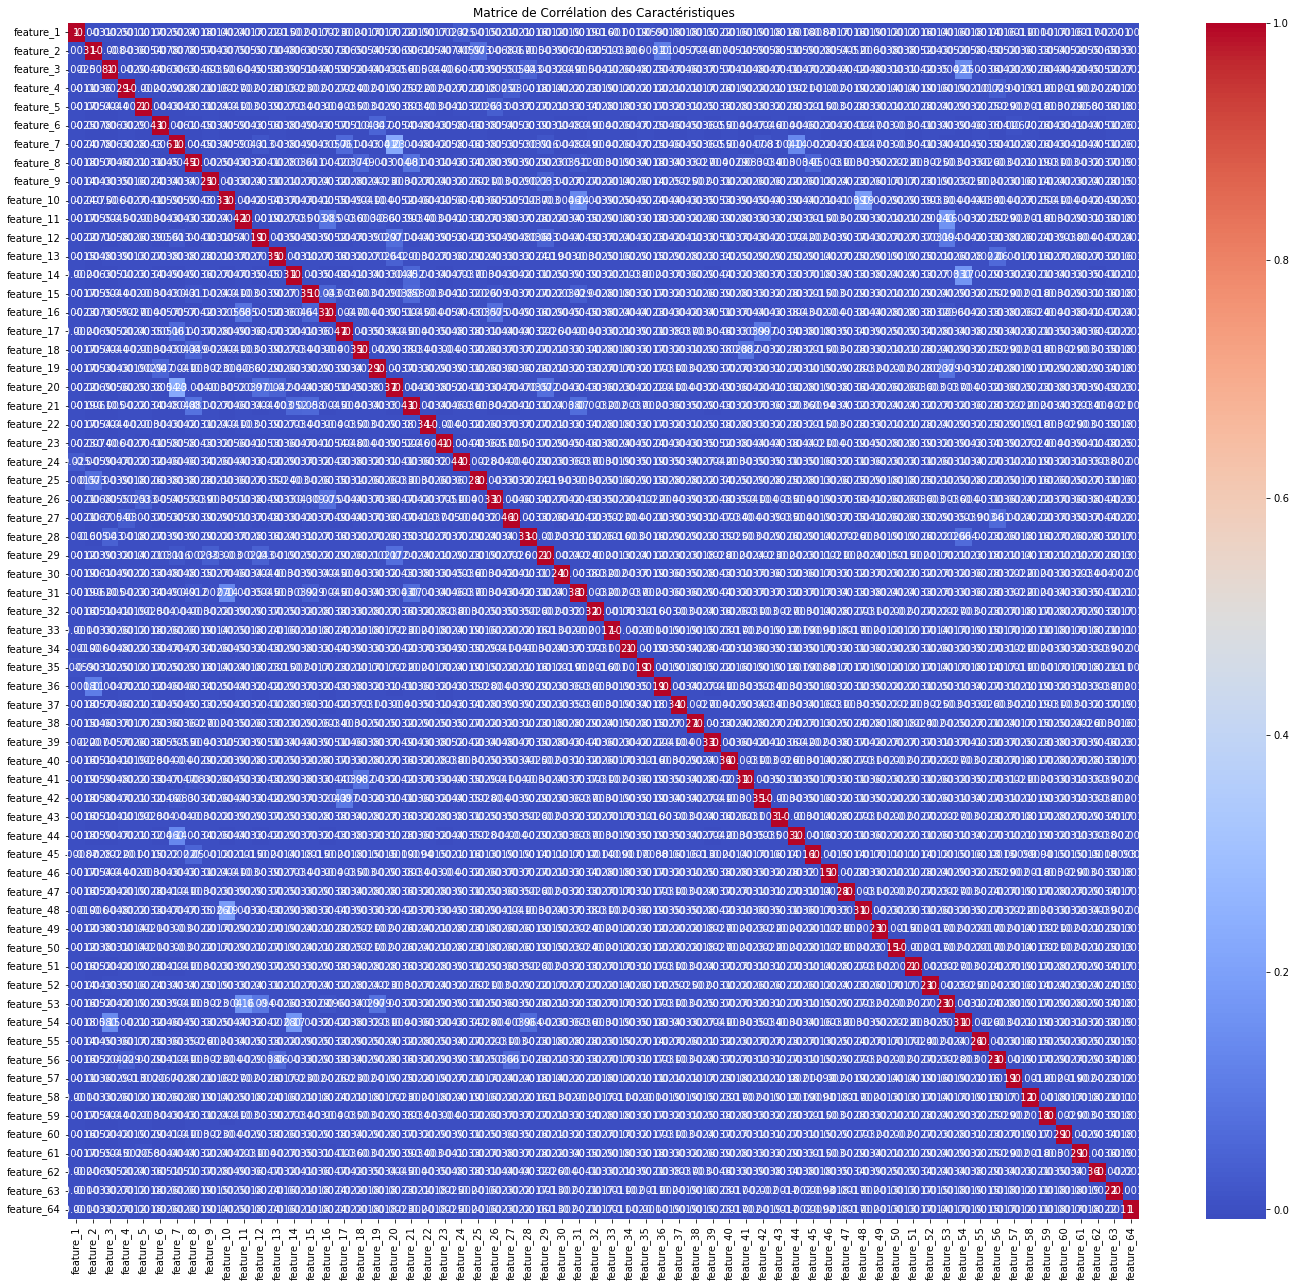

In [117]:
correlation_matrix = features_df_government.corr()

plt.figure(figsize=(24, 22))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.title('Matrice de Corrélation des Caractéristiques')
plt.show()


#### company

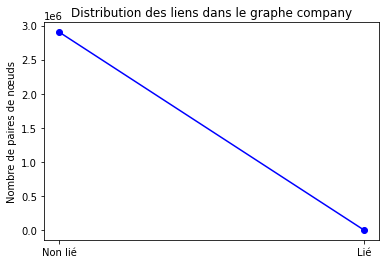

In [118]:
# Supposons que y soit votre matrice d'adjacence binaire
y_flat =adjacency_matrix_list[6].toarray().flatten()
linked_nodes = y_flat.sum()
non_linked_nodes = len(y_flat) - linked_nodes

# Tracer la courbe
plt.plot([0, 1], [non_linked_nodes, linked_nodes], marker='o', linestyle='-', color='b')
plt.xticks([0, 1], ['Non lié', 'Lié'])
plt.ylabel('Nombre de paires de nœuds')
plt.title('Distribution des liens dans le graphe company')
plt.show()


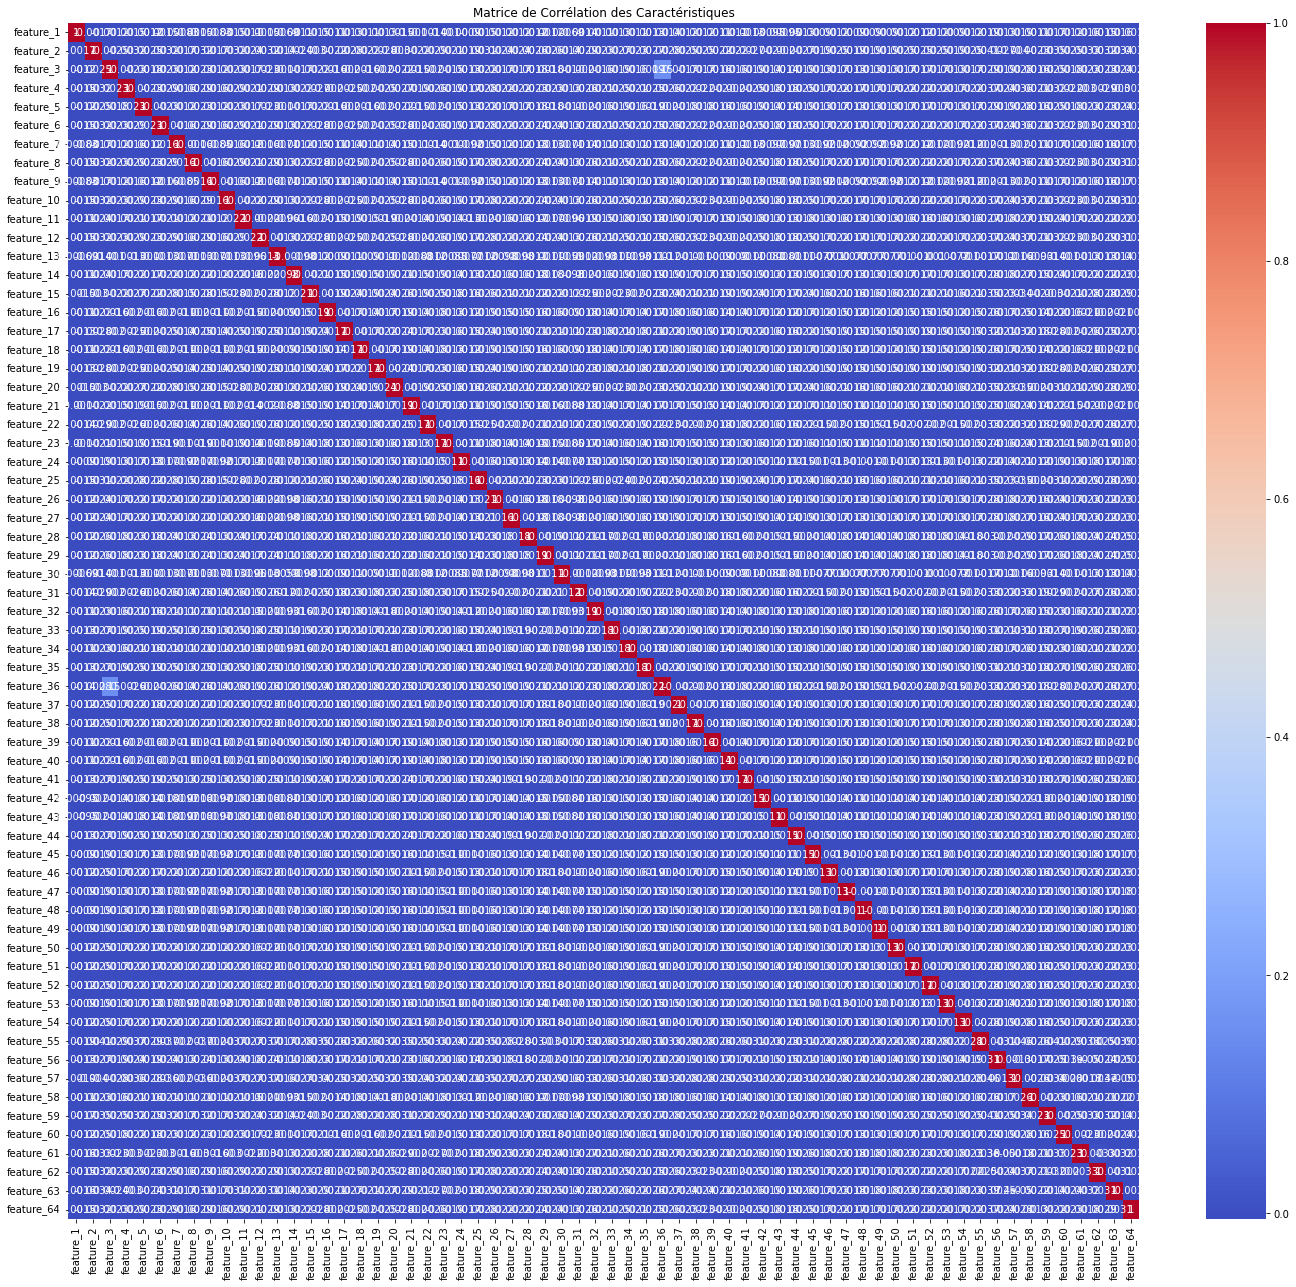

In [119]:
correlation_matrix = features_df_company.corr()

plt.figure(figsize=(24, 22))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.title('Matrice de Corrélation des Caractéristiques')
plt.show()


#### athletes

In [120]:
# Supposons que y soit votre matrice d'adjacence binaire
y_flat =adjacency_matrix_list[7].toarray().flatten()
linked_nodes = y_flat.sum()
non_linked_nodes = len(y_flat) - linked_nodes

# Tracer la courbe
plt.plot([0, 1], [non_linked_nodes, linked_nodes], marker='o', linestyle='-', color='b')
plt.xticks([0, 1], ['Non lié', 'Lié'])
plt.ylabel('Nombre de paires de nœuds')
plt.title('Distribution des liens dans le graphe athletes')
plt.show()


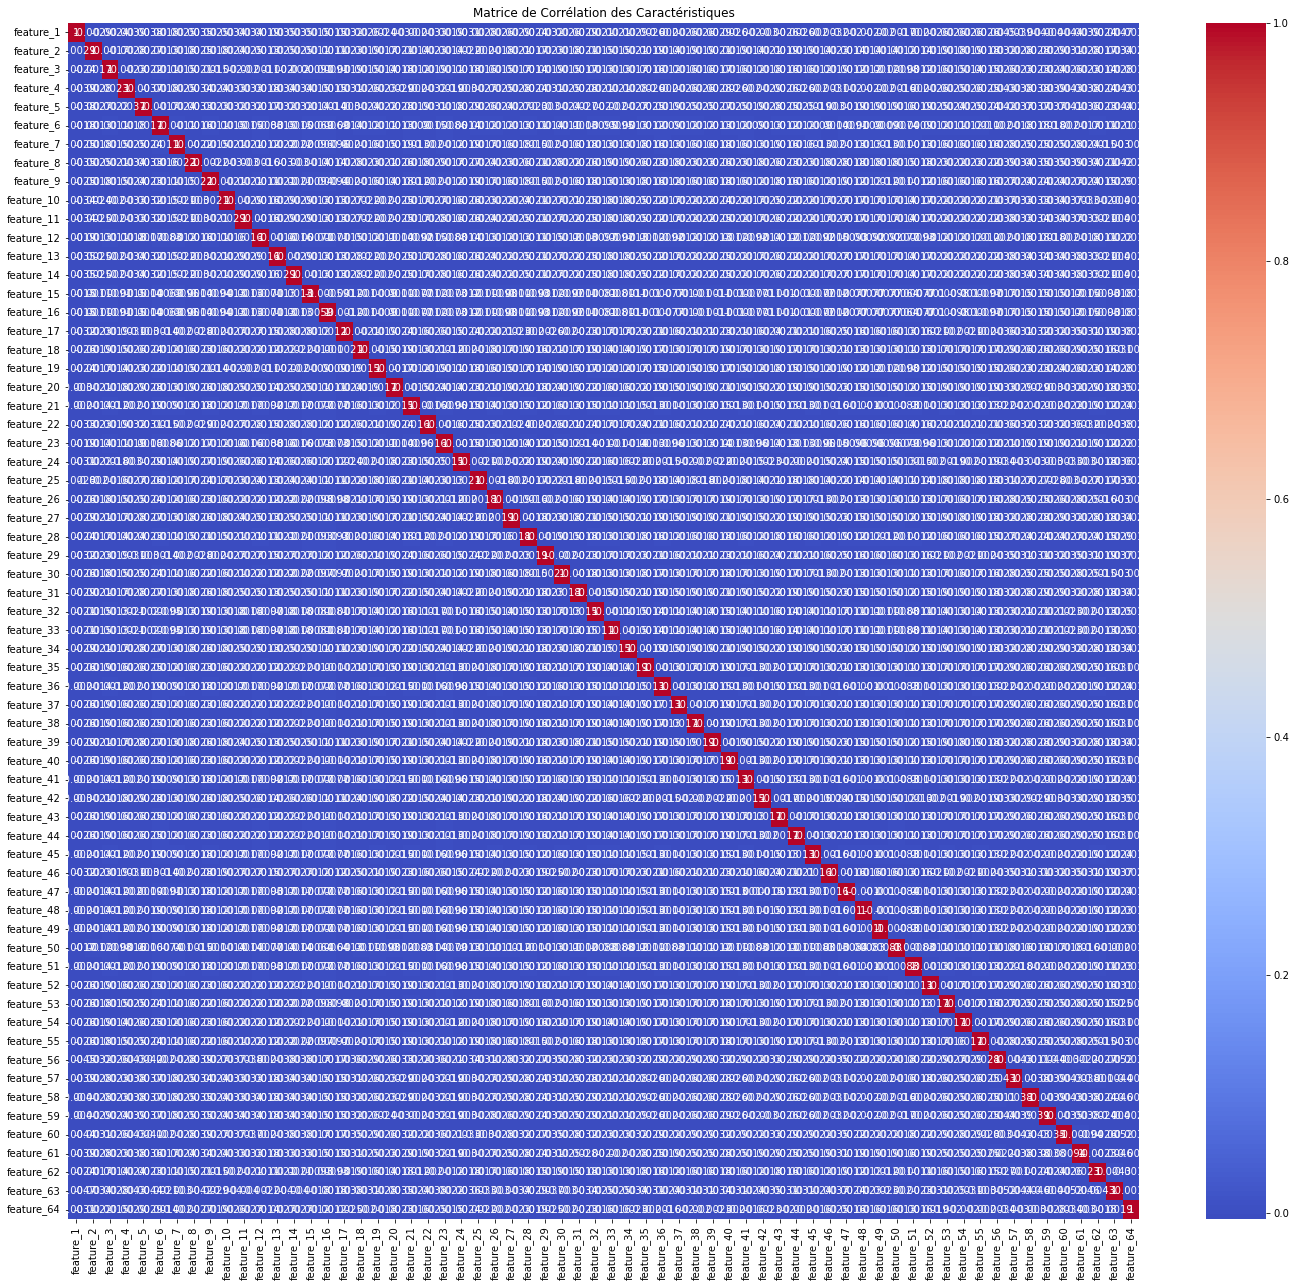

In [121]:
correlation_matrix = features_df_athletes.corr()

plt.figure(figsize=(24, 22))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.title('Matrice de Corrélation des Caractéristiques')
plt.show()


### préparation des données 

In [129]:

# Supposons que adjacency_matrix_list[0].toarray() soit votre matrice d'adjacence
# et features_df soit votre DataFrame de caractéristiques

# Créer des indices pour les paires de nœuds
indices_liens = np.argwhere(adjacency_matrix_list[0].toarray() == 1)  # indices des liens
indices_non_liens = np.argwhere(adjacency_matrix_list[0].toarray() == 0)  # indices des non-liens

batch_size = 1000  # Taille du lot

# Diviser les indices des liens en lots
batches_liens = [indices_liens[i:i+batch_size] for i in range(0, len(indices_liens), batch_size)]

# Diviser les indices des non-liens en lots
batches_non_liens = [indices_non_liens[i:i+batch_size] for i in range(0, len(indices_non_liens), batch_size)]

# Initialisez une liste pour stocker les DataFrames de chaque lot
df_batches = []

# Traiter chaque lot séparément
for batch_liens, batch_non_liens in zip(batches_liens, batches_non_liens):
    # Récupérer les caractéristiques correspondantes pour chaque paire de nœuds liés
    node_1_features_liens = features_df_artist.values[batch_liens[:, 0]]
    node_2_features_liens = features_df_artist.values[batch_liens[:, 1]]

    # Récupérer les caractéristiques correspondantes pour chaque paire de nœuds non liés
    node_1_features_non_liens = features_df_artist.values[batch_non_liens[:, 0]]
    node_2_features_non_liens = features_df_artist.values[batch_non_liens[:, 1]]

    # Créer les DataFrames pour chaque lot
    df_liens = pd.DataFrame({
        'node_1_features': node_1_features_liens.tolist(),
        'node_2_features': node_2_features_liens.tolist(),
        'relation': 1  # 1 indique que les nœuds sont liés
    })

    df_non_liens = pd.DataFrame({
        'node_1_features': node_1_features_non_liens.tolist(),
        'node_2_features': node_2_features_non_liens.tolist(),
        'relation': 0  # 0 indique que les nœuds ne sont pas liés
    })

    # Concaténer les DataFrames des liens et des non-liens pour chaque lot
    df_batch = pd.concat([df_liens, df_non_liens], ignore_index=True)

    # Ajouter le DataFrame du lot à la liste
    df_batches.append(df_batch)

# Concaténer les DataFrames de tous les lots
df_final = pd.concat(df_batches, ignore_index=True)

In [132]:
# Calculer le pourcentage des valeurs dans la colonne "relation"
pourcentage_relation = df_final['relation'].value_counts(normalize=True) * 100

# Afficher les résultats
print("Pourcentage de relations liées (1) :", pourcentage_relation[1])
print("Pourcentage de relations non liées (0) :", pourcentage_relation[0])


Pourcentage de relations liées (1) : 50.0
Pourcentage de relations non liées (0) : 50.0


In [134]:
df_final

node_1_features  \
0     [0.0, 0.0, 3.7419330158572014e-19, 3.152389777...   
1     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2     [0.0, 0.0, 0.0, 3.200369011156664e-18, 0.0, 0....   
3     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4     [0.0, 0.0, 3.4472285798671427e-18, 0.0, 0.0, 0...   
...                                                 ...   
3995  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3996  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3997  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3998  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3999  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                        node_2_features  relation  
0     [0.0, 0.0, 0.0, 0.0, 0.0, 1.8021225247048837e-...         1  
1     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...         1  
2     [0.0, 0.0, 0.0, 2.9588326875929617e-18, 0.0, 0...         1  
3     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...         1  
4     [0.0, 0.0, 3.0370400275590574e-19, 3.090294823...         1  
...                                                 ...       ...  
3995  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...         0  
3996  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...         0  
3997  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...         0  
3998  [0.0, 0.0, 4.492378342373968e-19, 2.7984990064...         0  
3999  [0.0, 0.0, 0.0, 2.4620252363599958e-11, 0.0, 9...         0  

[4000 rows x 3 columns]